In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

In [2]:
%matplotlib inline

In [19]:
# load dp moments and corresponding eeg
dps = np.load('DIPOLEMOMENT_Seed1234.npy')
#dps = np.load('DIPOLEMOMENT_25s_correct_placement_Seed12345_download.npy')
#eegs = np.load('Mazza2023/data/simulations_processed/SST_2.npy', allow_pickle=True).item(0)
eegs = np.load('Test-EEG-Signal2.npy')

#signal = eegs[seed]['ts_raw']
signal = eegs[0]

In [20]:
print(len(signal))

1200001


In [21]:

fs = 40000
s = int(2 * fs)
e = int(2.5 * fs)


#e = 300001
#s = e - 5000

times = np.arange(0,30000,30000/len(signal)) # adjust to your simulation times

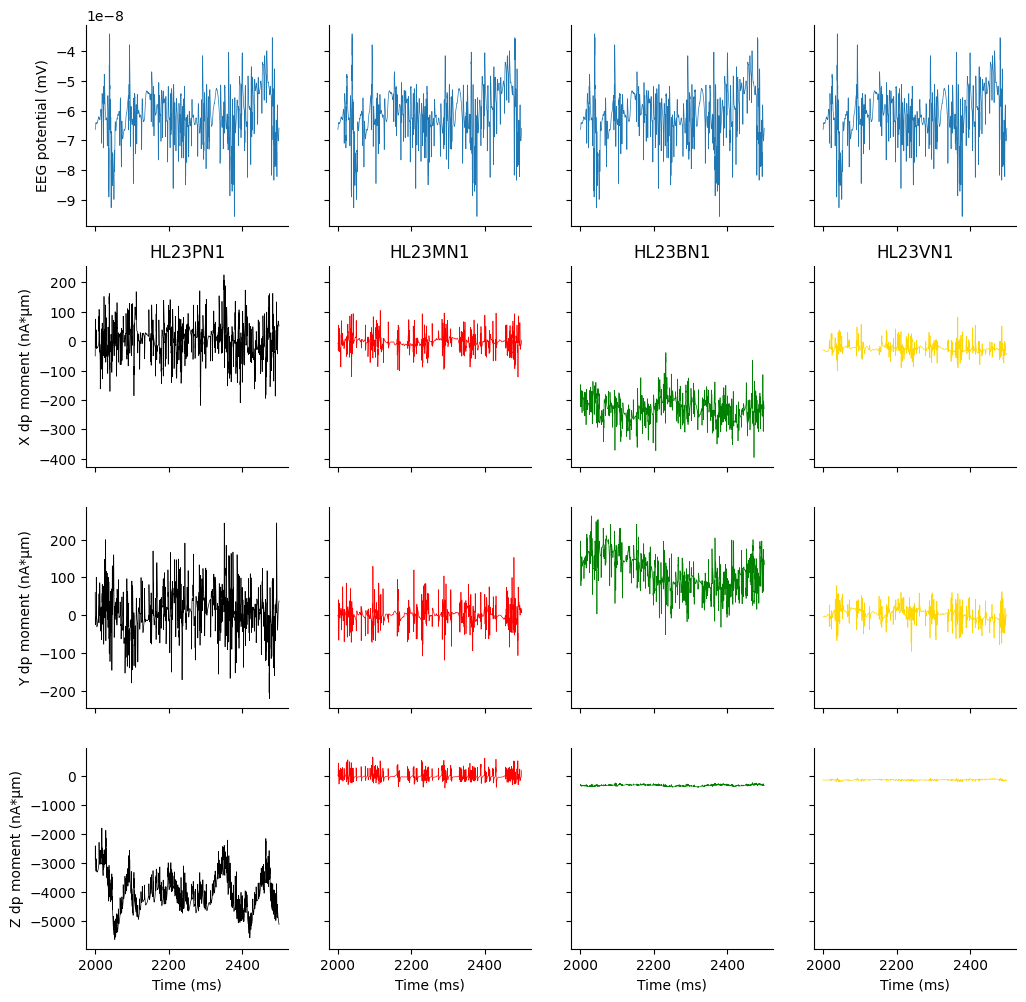

In [22]:
#######################
# Plot dp moments & EEG
#######################

fig, axes = plt.subplots(figsize=(12,12),ncols=4,nrows=4, sharey='row')


colors = {'HL23PN1':'k','HL23MN1':'red','HL23BN1':'green','HL23VN1':'gold'}
# plot eeg
_ = [axes[0][i].plot(times[s:e],signal[s:e], lw=0.5) for i in range(4)] # for visual comparison, same signal
# plot dipolemoments 
for c,cellname in enumerate(dps.dtype.names):
    for dp_comp in [0,1,2]: # x, y, z components of dipole
        axes[dp_comp+1][c].plot(times[s:e],dps[cellname][:,dp_comp][s:e], color=colors[cellname],label=cellname, lw=.5)
    axes[1][c].set_title(cellname)
    
# visual formatting
[ax.spines[spine].set_visible(False) for spine in ['top','right'] for row in axes for ax in row]
[ax.set_xticklabels('') for row in axes[:-1] for ax in row]
[ax.set_xlabel('Time (ms)') for ax in axes[-1]]

axes[0][0].set_ylabel('EEG potential (mV)')
axes[1][0].set_ylabel('X dp moment (nA*µm)')
axes[2][0].set_ylabel('Y dp moment (nA*µm)')
_ = axes[3][0].set_ylabel('Z dp moment (nA*µm)')

#plt.savefig('EEG-Dipole-components.png',dpi=200)

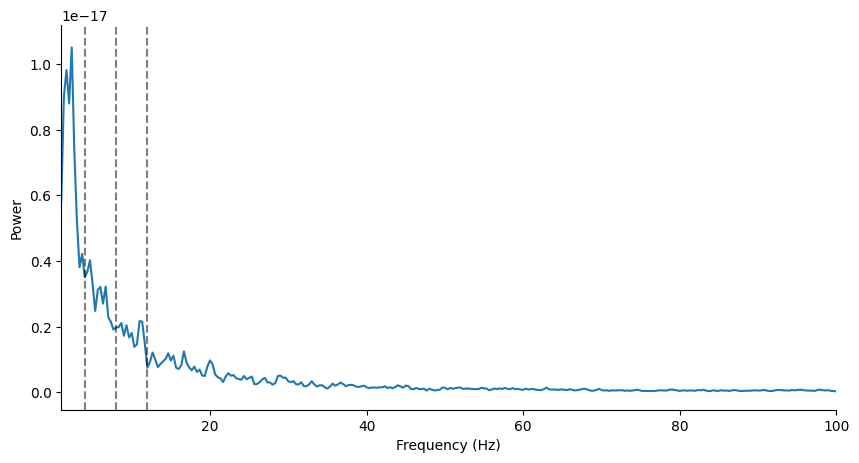

In [32]:
#######################
# Calc & plot PSD
#######################

fig,axes = plt.subplots(figsize=(10,5))

ts = signal.flatten()[2*fs:] # cut transient
nperseg = fs*3

freq_wel, ps_wel = ss.welch(ts,fs=fs,nperseg=nperseg)


axes.plot(freq_wel,ps_wel)
#axes.loglog(freq_wel,ps_wel)
axes.set_xlim(1,100)
axes.set_ylabel("Power")
axes.set_xlabel('Frequency (Hz)')
[axes.axvline(l,ls='--',color='k',alpha=.5) for l in [4,8,12]]
_ = [axes.spines[spine].set_visible(False) for spine in ['top','right']]

#plt.savefig('EEG-Spectrum.png',dpi=200)